# Operational Interpretability

Operational details of algorithmic decision making systems such as description of the process with thorough documentation about the algorithm used, assumptions made while using the dataset and constructing the model. This section should also include performance metrics of the algorithm on the dataset.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
df_stratified = pd.read_csv("risk_stratified_sample_14oct2019.csv")

In [4]:
df_stratified.drop(df_stratified.columns[df_stratified.columns.str.contains('unnamed',case=False)],axis=1,inplace=True)
df_stratified.head()

,x_11,x_21,x_22,x_31,x_32,x_41,x_51,x_52,x_61,x_62,output,categories
0,0.2,1.0,1.0,0.4,0.3,0.4,0.65,0.50,0.9,0.2,1.696900,2.0
1,1.0,0.8,1.0,0.6,1.0,0.4,0.65,0.80,0.9,0.3,4.830400,5.0
2,0.5,1.0,1.0,0.4,0.3,0.4,0.60,0.60,1.0,0.9,2.840650,3.0
3,1.0,0.8,0.4,0.8,0.1,0.8,1.00,0.65,1.0,0.9,4.123420,4.0
4,0.5,1.0,0.6,1.0,0.3,0.4,1.00,0.50,0.2,0.9,2.682875,3.0


In [5]:
df_stratified.drop(columns=['output'],inplace=True)
X = df_stratified.drop(columns=['categories'])
Y = df_stratified['categories']
X_train , X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.4,random_state=42,stratify=Y)

In [6]:
print("Train data shape : {} and Test data shape : {}".format(X_train.shape,X_test.shape))

Train data shape : (566230, 10) and Test data shape : (377488, 10)


## LOGISTIC REGRESSION CLASSIFIER


Logistic Regression is a commonly used statistical method for analysing and predicting data with one or more independent variables and one binary dependent variable; for example spam or not spam email classifiers, benign or malignant tumor detection. 

A logistic regression classifier tries to fit data according to a linear hypothesis function such as:
__Y= W(i)x(i) + B__ (Similar to a line equation) 

Where Y is the dependent variable, X represents independent variables from 1 to n, B gives an error bias (negligible) and W is the weight assigned to each variable. W is an important value as it tells us the individual contributions of variables in determining Y, our target. 

In [6]:
from sklearn.linear_model import LogisticRegression

Regression is always accompanied by regularization, primarily to reduce overfitting. Here we use ridge regularization which is a more stable form.

In [7]:
model = LogisticRegression(penalty='l2',solver = 'lbfgs')
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
count_misclassified = (Y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(Y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

/home/ubuntu/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Misclassified samples: 96031
Accuracy: 0.75


The interpretation of weights in logistic regression is dependent on the probability of class classification, the weighted sum is transformed by the logistic function to a probability. Therefore the interpretation equation is:

The log function calculates the odds of an event occurring.
*************add image
***********************************************

************

Logistic regression is used over linear regression as completely linear model does not output probabilities, but it treats the classes as numbers (0 and 1) and fits the best hyperplane (for a single feature, it is a line) that minimizes the distances between the points and the hyperplane. So it simply interpolates between the points, and you cannot interpret it as probabilities. A linear model also extrapolates and gives you values below zero and above one. Logistic regression is also widely used, interpretable and fits our use case relatively well.


In [8]:
print(metrics.classification_report(Y_test,y_pred,target_names=['no risk','low risk','moderate','likes risk','high risk']))

              precision    recall  f1-score   support

     no risk       0.97      0.96      0.97     60932
    low risk       0.68      0.92      0.78    137559
    moderate       0.56      0.28      0.37     94906
  likes risk       0.77      0.78      0.78     56511
   high risk       0.97      0.92      0.94     27580

    accuracy                           0.75    377488
   macro avg       0.79      0.77      0.77    377488
weighted avg       0.73      0.75      0.72    377488



#### The equation added as sgd_equation is the represantative equation for the whole dataset generated using stochastic gradient descent. Refer the Linear SGD equation file for deets, values found after a 1000 iterations.

In [9]:
LR_coeff_df = pd.DataFrame(model.coef_,columns=['x_11','x_21','x_22','x_31','x_32','x_41','x_51','x_52','x_61','x_62'])
LR_coeff_df['Class'] = ['no risk','low risk','moderate','likes risk','high risk']
sgd_row = {"Class":"SGD equation","x_11":2.663673,"x_21":1.420705,"x_22":0.336652,
"x_31"    :0.048391,
"x_32"   : 0.618651,
"x_41"  : -0.583775,
"x_51":    0.013008,
"x_52":   -0.470474,
"x_61" :   0.188667,
"x_62":   -0.057476}
LR_coeff_df = LR_coeff_df.append(sgd_row,ignore_index=True)

In [10]:
LR_coeff_df[['Class','x_11','x_21','x_22','x_31','x_32','x_41','x_51','x_52','x_61','x_62']]

,Class,x_11,x_21,x_22,x_31,x_32,x_41,x_51,x_52,x_61,x_62
0,no risk,-74.900631,-42.756345,-6.806257,-4.020138,-22.932878,-1.871084,-5.928420,-6.294438,-4.033414,-0.692863
1,low risk,-3.549860,0.404575,-0.352370,-0.218315,-0.018350,-0.086049,-0.325397,-0.375934,-0.254416,-0.077527
2,moderate,1.515754,0.143127,0.176856,0.163927,0.964164,0.037354,0.191780,0.178652,0.157874,0.019491
3,likes risk,9.495009,4.380873,-0.063696,-0.273479,-0.365843,-0.145721,-0.701024,-0.851686,-0.393691,-0.264489
4,high risk,48.097769,43.891817,13.275078,9.599984,14.138681,4.809087,15.661030,18.875388,10.446535,4.264161
5,SGD equation,2.663673,1.420705,0.336652,0.048391,0.618651,-0.583775,0.013008,-0.470474,0.188667,-0.057476


## Gaussian NAIVE BAYES CLASSIFIER


Naive bayes classifiers are a family of classifiers that work on predicting future outcomes using conditional probability, given a history of behaviour; for example given say a year long history of weather forecasts with features such as humidity, rainfall, temperature a classifier from the naive bayes family can be trained and used to predict future weather conditions. 

The bayes algorithm works under a “naive” assumption that all the features are independent in nature, in our case that means the naive bayes classifier is going to assume that our variables such as age, income are uncorrelated so finding probabilities can be thought of as a simple counting calculation. This implies that the classifier won’t be a right fit for our case as we know that the data was generated using many correlations (such as age will affect an individual's income, behaviour etc..). Due to its simplicity it has found a place in many real world systems such as credit scoring systems, weather prediction and many others so for the sake of representing and explaining all classifiers we will try this one out as well.


If the naive bayes classifier wants to calculate the probability of observing features f1 to fn, given a class c (In our case c here,represents the risk class and f values represent all our question-answer scores), then

This means that when Naive Bayes is used to classify a new example, the posterior probability is much simpler to work with:

But we have left p(fn | c) undefined i.e. the occurrence of a certain feature given a class which means we haven’t taken the distribution of the features into account yet. Therefore for our case we have used a gaussian naive bayes classifier that simply assumes p (fn | c) is a gaussian normal distribution, this works well for our data which is a normal distribution.
Then the formula for our low risk class used by the classifier will be something like:
P ( low-risk / Age, Income, Dependents ..) = P( low-risk / Age-category) * P(low-risk / Income-category)  etc/ P(Age) * P(income) etc 
This will be calculated for all risk categories and the class with the highest probability is given as the final prediction.


In [11]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train, Y_train) 
gnb_predictions = gnb.predict(X_test) 

In [12]:
count_misclassified_gnb = (Y_test != gnb_predictions).sum()
print('Misclassified samples: {}'.format(count_misclassified_gnb))
accuracy_gnb = metrics.accuracy_score(Y_test, gnb_predictions)
print('Accuracy: {:.2f}'.format(accuracy_gnb))

Misclassified samples: 153761
Accuracy: 0.59


In [13]:
print(metrics.classification_report(Y_test,gnb_predictions,target_names=['no risk','low risk','moderate','likes risk','high risk']))

/home/ubuntu/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

     no risk       1.00      0.69      0.82     60932
    low risk       0.62      0.94      0.75    137559
    moderate       0.74      0.26      0.38     94906
  likes risk       0.00      0.00      0.00     56511
   high risk       0.29      1.00      0.45     27580

    accuracy                           0.59    377488
   macro avg       0.53      0.58      0.48    377488
weighted avg       0.59      0.59      0.53    377488



Classes in the model

In [14]:
gnb.classes_

array([1., 2., 3., 4., 5.])

__Probabilities of each class.__

In [15]:
gnb.class_prior_

array([0.16141497, 0.36440669, 0.25141374, 0.14970242, 0.07306218])

Counts of each class.

In [16]:
gnb.class_count_

array([ 91398., 206338., 142358.,  84766.,  41370.])

__Variance of each feature per class__

In [17]:
gnb.sigma_

array([[9.42398079e-03, 4.68723770e-02, 5.56722717e-02, 8.10443174e-02,
        1.06371063e-01, 2.20399470e-02, 3.79039784e-02, 1.00226347e-02,
        1.28340602e-01, 1.01230882e-01],
       [4.33987700e-02, 5.22082510e-02, 7.45763051e-02, 8.04481980e-02,
        1.12595308e-01, 2.22822306e-02, 4.04349485e-02, 9.97388384e-03,
        1.29791124e-01, 1.01376384e-01],
       [5.85416619e-02, 5.62066827e-02, 7.35366576e-02, 8.03623549e-02,
        1.05850499e-01, 2.25140756e-02, 4.25974688e-02, 9.98453481e-03,
        1.30751003e-01, 1.01348794e-01],
       [5.43297567e-03, 1.24480296e-02, 7.61094953e-02, 7.89359830e-02,
        1.13821570e-01, 2.21745690e-02, 3.84970605e-02, 9.95139439e-03,
        1.27005485e-01, 1.00681888e-01],
       [1.30387606e-10, 6.99186079e-03, 6.74146306e-02, 7.41051653e-02,
        7.46135399e-02, 2.37036014e-02, 5.04110707e-02, 9.52353542e-03,
        1.09863049e-01, 1.01488765e-01]])

Absolute additive value to variances

In [18]:
gnb.epsilon_

1.3038760591984656e-10

In [19]:
NB_coeff_df = pd.DataFrame(gnb.sigma_,columns=['x_11','x_21','x_22','x_31','x_32','x_41','x_51','x_52','x_61','x_62'])

In [20]:
NB_coeff_df['Counts'] = gnb.class_count_
NB_coeff_df['Prior Probabilities'] = gnb.class_prior_
NB_coeff_df['Class'] = ['no risk','low risk','moderate','likes risk','high risk']

In [21]:
NB_coeff_df[['Class','Prior Probabilities','Counts','x_11','x_21','x_22','x_31','x_32','x_41','x_51','x_52','x_61','x_62']]

,Class,Prior Probabilities,Counts,x_11,x_21,x_22,x_31,x_32,x_41,x_51,x_52,x_61,x_62
0,no risk,0.161415,91398.0,9.423981e-03,0.046872,0.055672,0.081044,0.106371,0.022040,0.037904,0.010023,0.128341,0.101231
1,low risk,0.364407,206338.0,4.339877e-02,0.052208,0.074576,0.080448,0.112595,0.022282,0.040435,0.009974,0.129791,0.101376
2,moderate,0.251414,142358.0,5.854166e-02,0.056207,0.073537,0.080362,0.105850,0.022514,0.042597,0.009985,0.130751,0.101349
3,likes risk,0.149702,84766.0,5.432976e-03,0.012448,0.076109,0.078936,0.113822,0.022175,0.038497,0.009951,0.127005,0.100682
4,high risk,0.073062,41370.0,1.303876e-10,0.006992,0.067415,0.074105,0.074614,0.023704,0.050411,0.009524,0.109863,0.101489


Naive Bayes is an interpretable model because of the independence assumption. It can be interpreted on the modular level. The contribution made by each feature towards a specific class prediction is clear, since we can interpret the conditional probability. The algorithms interpretability using various methods is demonstrated in the other notebooks

## DECISION TREE

Decision trees belong to the family of tree based learning algorithms, they are widely used for supervised classification as they create precise, well defined and hierarchical decision boundaries for categorical and continuous data. This differs from classifiers that use a single separation boundary (or line) such as logistic regression by iteratively splitting the data into subparts by identifying multiple divisive boundaries. 

The conditions that make these divisions try to ensure an absence of impurities in the populations contained by them; for example a condition that decision tree will make to describes a ‘banana’ could be in the sequence type=”fruit”, colour = “yellow”, shape = “crescent”, spots = “true” this leaves no place for uncertainty or impurity. The algorithm stops when all classes are pure or there are no features left to divide upon.
Unfortunately such sharp dividing conditions are not always possible or may exceed certain time and space limitations in real life. Therefore when a clear separation of classes is not possible then we can have a stopping condition that tolerates some impurity (For example gini impurity measures quality of such splits by calculating the probability of an incorrect classification of a randomly picked datapoint). 
The impurity itself can be calculated using a measure of randomness, entropy: H= -p(x)log(p(x))or -plog(p) -qlog(q) where p =probability of success and q = prob of failure 
Ideally H should be as small as possible.

For a dataset like ours with multiple features, deciding the splitting feature i.e. most important dividing condition at each step is a complex task, this feature should reduce the impurity through the split or one with gives the most information gain. Information gain at each node is calculated by the lowest entropy generated nodes by the split.

In [12]:
# training a DescisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 16).fit(X_train, Y_train) 
dtree_predictions = dtree_model.predict(X_test) 

In [13]:
count_misclassified_dtree = (Y_test != dtree_predictions).sum()
print('Misclassified samples: {}'.format(count_misclassified_dtree))
accuracy_dtree = metrics.accuracy_score(Y_test, dtree_predictions)
print('Accuracy: {:.2f}'.format(accuracy_dtree))

Misclassified samples: 11779
Accuracy: 0.97


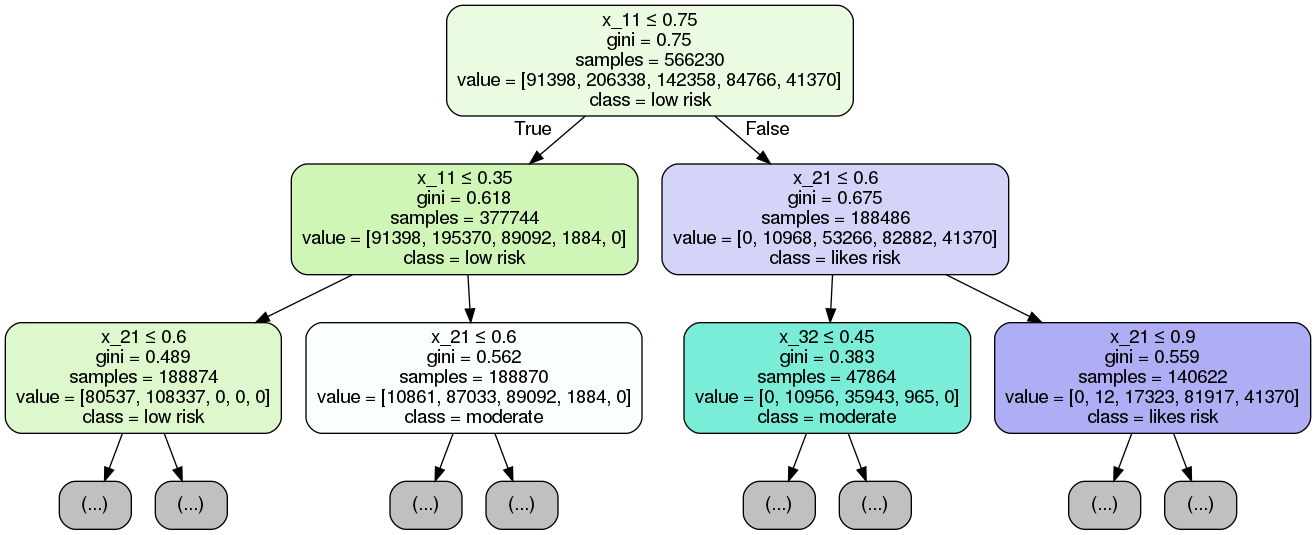

In [15]:
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from IPython.display import Image
import graphviz

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dtree_model, out_file=dot_data,  
                filled=True,max_depth=2, rounded=True,feature_names=['x_11','x_21','x_22','x_31','x_32','x_41','x_51','x_52','x_61','x_62'],
                special_characters=True,class_names=['no risk','low risk','moderate','likes risk','high risk'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

In [16]:
print(metrics.classification_report(Y_test,dtree_predictions,target_names=['no risk','low risk','moderate','likes risk','high risk']))

              precision    recall  f1-score   support

     no risk       0.99      0.99      0.99     60932
    low risk       0.98      0.98      0.98    137559
    moderate       0.97      0.97      0.97     94906
  likes risk       0.94      0.94      0.94     56511
   high risk       0.94      0.92      0.93     27580

    accuracy                           0.97    377488
   macro avg       0.96      0.96      0.96    377488
weighted avg       0.97      0.97      0.97    377488



In [18]:
dtree_model.classes_

array([1., 2., 3., 4., 5.])

In [19]:
dtree_model.feature_importances_

array([0.23901751, 0.29250996, 0.07314801, 0.04685759, 0.18416961,
       0.00913005, 0.05225388, 0.03116019, 0.0572915 , 0.0144617 ])

In [60]:
sgd_row_1 = [2.663673,1.420705,0.336652,0.048391,0.618651,-0.583775,0.013008,-0.470474,0.188667,-0.057476]
dtree_row = pd.DataFrame([dtree_model.feature_importances_,sgd_row_1],columns=['x_11','x_21','x_22','x_31','x_32','x_41','x_51','x_52','x_61','x_62'])
dtree_row['Equations'] = ['DTree feature importance','SGD Equation']

In [62]:
dtree_row[['Equations','x_11','x_21','x_22','x_31','x_32','x_41','x_51','x_52','x_61','x_62']]

,Equations,x_11,x_21,x_22,x_31,x_32,x_41,x_51,x_52,x_61,x_62
0,DTree feature importance,0.239018,0.292510,0.073148,0.046858,0.184170,0.009130,0.052254,0.031160,0.057292,0.014462
1,SGD Equation,2.663673,1.420705,0.336652,0.048391,0.618651,-0.583775,0.013008,-0.470474,0.188667,-0.057476


In [65]:
dtree_model.max_features_

10

In [66]:
dtree_model.n_features_

10

In [67]:
dtree_model.n_outputs_

1

## SUPPORT VECTOR MACHINE

A support vector machine finds an equation of a hyper-plane that separates two or more classes in a multidimensional space; for example if we consider a two dimensional space this “hyperplane” will become a line dividing the plane on which the data lies into two seperate classes. If the data is not linearly separable i.e. there is no clear line separating the classes (This happens in many cases imagine two classes in the data forming concentric circles ) then data can be transformed onto a different plane (say we view the concentric circles from z axis ) it becomes a linearly separable problem again ( Imagine the points in the circle having different depth ), after separating we can transform it back to the original plane : this is done using a kernel function in SVM. 

Support vector machines have become wildly popular due to their robust efficiency and high accuracy despite requiring very few samples to train. They have disadvantages especially when it comes to time and space complexity but the SVM algorithm along with it’s variations are being used commercially in face detection, protein fold predictions etc..


SVM for multiclass classification trains n*(n-1)/2 classifiers, where n is the number of classes in the problem. Therefore for our problem there will be 10 different classifiers each will choose permutations of classes as the binary dependent variable(Y) i.e. 1 or 2, 2 or 3, 1 or 4 and all others. During this each classifier predicts one class instead of probabilities for each. 

reduced training samples.

In [7]:
X_train_svc , X_test_svc, Y_train_svc, Y_test_svc = train_test_split(X,Y,test_size=0.98,random_state=42,stratify=Y)

In [8]:
X_train_svc.shape

(18874, 10)

In [9]:
# training a polynomial SVM classifier 
from sklearn.svm import SVC 
poly_model = SVC(kernel = 'poly', C = 1,probability=True).fit(X_train_svc, Y_train_svc) 
Y_svc_predictions = poly_model.predict(X_test_svc) 

/home/ubuntu/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [10]:
count_misclassified_poly = (Y_test_svc != Y_svc_predictions).sum()
print('Misclassified samples: {}'.format(count_misclassified_poly))
accuracy = metrics.accuracy_score(Y_test_svc, Y_svc_predictions)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 68426
Accuracy: 0.93


In [11]:
print(metrics.classification_report(Y_test_svc,Y_svc_predictions,target_names=['no risk','low risk','moderate','likes risk','high risk']))

              precision    recall  f1-score   support

     no risk       0.94      0.90      0.92    149283
    low risk       0.93      0.96      0.95    337019
    moderate       0.95      0.90      0.93    232519
  likes risk       0.84      0.96      0.90    138452
   high risk       0.98      0.84      0.91     67571

    accuracy                           0.93    924844
   macro avg       0.93      0.91      0.92    924844
weighted avg       0.93      0.93      0.93    924844



Support vectors for our data samples.

In [15]:
poly_model.support_vectors_

array([[0.2 , 0.8 , 0.6 , ..., 0.6 , 1.  , 0.2 ],
       [0.5 , 0.4 , 0.2 , ..., 0.8 , 0.5 , 1.  ],
       [0.2 , 0.8 , 0.4 , ..., 0.8 , 1.  , 0.2 ],
       ...,
       [1.  , 1.  , 0.8 , ..., 0.5 , 1.  , 0.9 ],
       [1.  , 0.8 , 1.  , ..., 0.65, 0.2 , 0.5 ],
       [1.  , 1.  , 0.6 , ..., 0.8 , 0.5 , 0.5 ]])

In [17]:
poly_model.n_support_

array([2005, 3893, 2834, 1746,  813], dtype=int32)

In [18]:
poly_model.dual_coef_

array([[ 1.,  1.,  1., ..., -0., -0., -0.],
       [ 1.,  1.,  0., ..., -0., -0., -0.],
       [ 0.,  1.,  0., ..., -1., -1., -1.],
       [ 0.,  0.,  0., ..., -1., -1., -1.]])

okay this is weird only linear svc uses one vs rest decisions and we are using polynomial

In [19]:
poly_model.decision_function

<bound method BaseSVC.decision_function of SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)>

In [20]:
poly_model.decision_function_shape

'ovr'

In [22]:
poly_model.intercept_

array([2.48417753, 2.32709034, 1.65612356, 1.56388224, 4.34139146,
       3.35792726, 2.57588695, 4.22900647, 4.68790241, 7.92279502])

In [23]:
poly_model.probA_

array([-6.47236153, -6.96352574, -6.492837  , -6.34116641, -7.44150538,
       -6.83482349, -6.27864424, -3.7074536 , -6.57060247, -4.10951948])

In [24]:
poly_model.probB_

array([-0.6627711 ,  0.14800767, -0.37016808, -0.63929229,  0.24349838,
        0.09138972, -0.38212218, -0.68953952,  0.13136061,  0.61169366])

## K NEAREST NEIGHBORS

Neighbors-based classification is a type of instance-based learning or non-generalizing learning: it does not try to construct a general internal model, but simply stores instances of the training data. K nearest neighbors is perhaps the simplest algorithm, a data point is classified by a majority vote of its neighbors. The input is assigned the class most common among its ‘k’ nearest neighbors, where ‘k’ is a small positive integer, the value of ‘k’ is chosen depending on the data. KNN is very useful in applications that require searching for similar items; such as recommender systems, biosurveillance software, document retrieval systems such as concept search which is used in many e-Discovery software packages.  
    
    
These neighbors are decided using brute force techniques that calculate distance from the data point of interest to all the other data points in the dataset, by using formulae like euclidean distance. This means that the time and space complexity of this operation is very high; for n samples in d dimensions the time complexity will be O(d*n*n) which makes this algorithm too slow to run on large datasets such as ours but we will still cover it as it would be useful to see people and question-answers that could be grouped into one risk category.

In [25]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 10).fit(X_train, Y_train)
knn_predictions = knn.predict(X_test)
count_misclassified_knn = (Y_test != knn_predictions).sum()
print('Misclassified samples: {}'.format(count_misclassified_knn))
accuracy_knn = metrics.accuracy_score(Y_test, knn_predictions)
print('Accuracy: {:.2f}'.format(accuracy_knn))

Misclassified samples: 11883
Accuracy: 0.97


In [26]:
print(metrics.classification_report(Y_test,knn_predictions,target_names=['no risk','low risk','moderate','likes risk','high risk']))

              precision    recall  f1-score   support

     no risk       0.98      0.99      0.98     60932
    low risk       0.98      0.98      0.98    137559
    moderate       0.97      0.97      0.97     94906
  likes risk       0.94      0.95      0.94     56511
   high risk       0.95      0.91      0.93     27580

    accuracy                           0.97    377488
   macro avg       0.96      0.96      0.96    377488
weighted avg       0.97      0.97      0.97    377488



In [27]:
knn.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')>

In [30]:
graph = knn.kneighbors_graph()
print(graph)

  (0, 38458)	1.0
  (0, 76326)	1.0
  (0, 102658)	1.0
  (0, 378953)	1.0
  (0, 102976)	1.0
  (0, 350124)	1.0
  (0, 333313)	1.0
  (0, 401141)	1.0
  (0, 505582)	1.0
  (0, 334261)	1.0
  (1, 360792)	1.0
  (1, 392080)	1.0
  (1, 160769)	1.0
  (1, 409096)	1.0
  (1, 270750)	1.0
  (1, 422624)	1.0
  (1, 291669)	1.0
  (1, 181275)	1.0
  (1, 372964)	1.0
  (1, 392180)	1.0
  (2, 87628)	1.0
  (2, 500703)	1.0
  (2, 25182)	1.0
  (2, 350904)	1.0
  (2, 393648)	1.0
  :	:
  (566227, 186223)	1.0
  (566227, 16883)	1.0
  (566227, 81293)	1.0
  (566227, 487054)	1.0
  (566227, 105467)	1.0
  (566228, 98805)	1.0
  (566228, 144303)	1.0
  (566228, 43098)	1.0
  (566228, 81383)	1.0
  (566228, 34389)	1.0
  (566228, 124970)	1.0
  (566228, 533259)	1.0
  (566228, 249045)	1.0
  (566228, 332806)	1.0
  (566228, 379277)	1.0
  (566229, 297693)	1.0
  (566229, 3248)	1.0
  (566229, 212340)	1.0
  (566229, 517890)	1.0
  (566229, 289807)	1.0
  (566229, 291437)	1.0
  (566229, 244062)	1.0
  (566229, 528939)	1.0
  (566229, 368307)	1.0
  (5

In [32]:
X_test.iloc[10]

x_11    0.2
x_21    0.8
x_22    0.6
x_31    1.0
x_32    0.1
x_41    0.4
x_51    1.0
x_52    0.7
x_61    0.1
x_62    0.2
Name: 2022, dtype: float64

In [40]:
knn.kneighbors(np.array(X_test.iloc[10]).reshape(1, -1))

(array([[0.1       , 0.14142136, 0.14142136, 0.14142136, 0.14142136,
         0.15      , 0.15      , 0.17320508, 0.2       , 0.2       ]]),
 array([[467357, 294170, 242635, 461918, 555542, 272519, 481088,  63314,
         523824, 201046]]))

In [41]:
X_test.iloc[201046]

x_11    0.2
x_21    0.4
x_22    0.2
x_31    0.4
x_32    0.6
x_41    0.4
x_51    0.5
x_52    0.6
x_61    0.5
x_62    0.9
Name: 76820, dtype: float64

__Interpretabiltiy of KNN__


Since KNN is an instance based algorithm there is no learned model, there are no parameters to learn, so there is no interpretability on a modular level. There is a lack of global model interpretability because the model is inherently local and there are no global weights or structures explicitly learned. 
To explain a prediction at a local level, we can always retrieve the k neighbors that were used for the prediction. This is useful for our dataset as there will be thousands of neighboring data points but presenting those ‘k’ nearest points could be a very useful explanation for each category.